Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt due to missing or invalid Beam Width Clip data.
Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt due to missing or invalid Beam Width Clip data.
Processed 33 valid data points out of 35 files.
z = 2.0 mm, Width_x = 2.595 mm, Width_y = 2.759 mm
z = 2.5 mm, Width_x = 2.478 mm, Width_y = 2.650 mm
z = 3.0 mm, Width_x = 2.343 mm, Width_y = 2.439 mm
z = 3.5 mm, Width_x = 2.167 mm, Width_y = 2.263 mm
z = 4.0 mm, Width_x = 1.999 mm, Width_y = 2.053 mm
z = 4.5 mm, Width_x = 1.824 mm, Width_y = 1.8

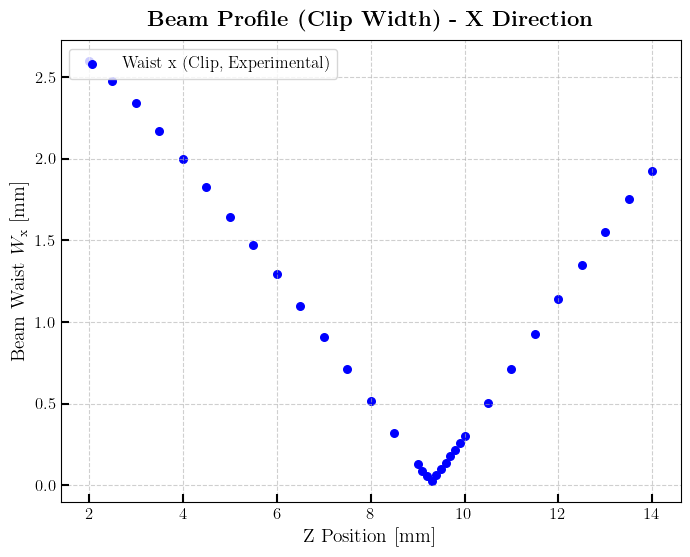

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_clip_y.png


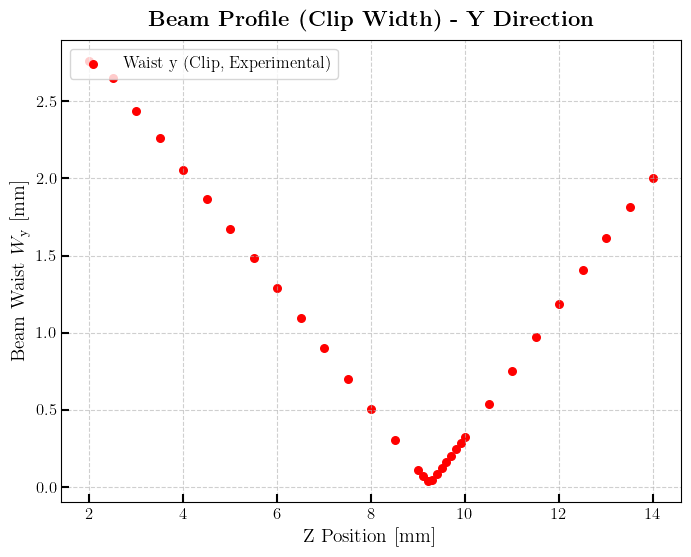

In [21]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt due to missing or invalid Beam Width Clip data.
Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt due to missing or invalid Beam Width Clip data.
Processed 33 valid data points out of 35 files.
Found beam width before the lens: Width x = 2.55183 mm, Width y = 2.17252 mm
z = 2.0 mm, Width_x = 2.595 mm, Width_y = 2.759 mm
z = 2.5 mm, Width_x = 2.478 mm, Width_y = 2.650 mm
z = 3.0 mm, Width_x = 2.343 mm, Width_y = 2.439 mm
z = 3.5 mm, Width_x = 2.167 mm, Width_y = 2.263 mm
z = 4.0 mm, Width_x

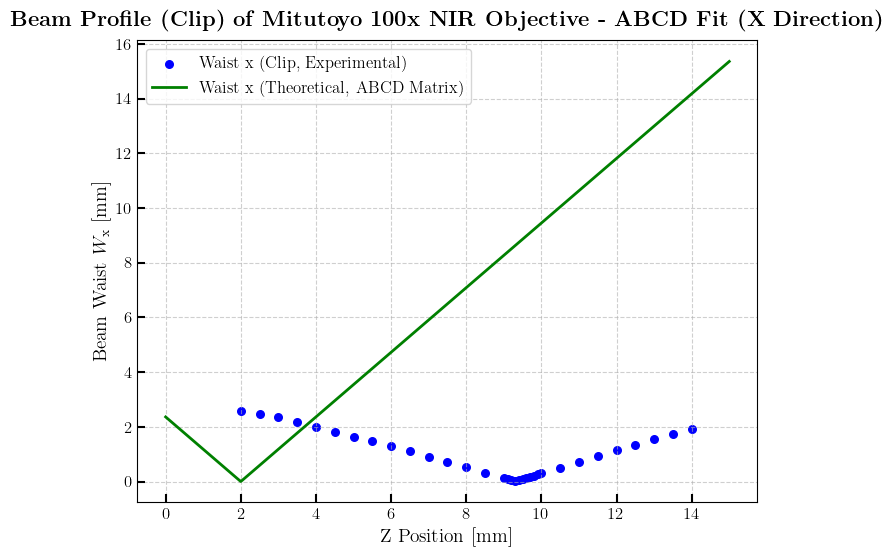

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_clip_ABCD_y.png


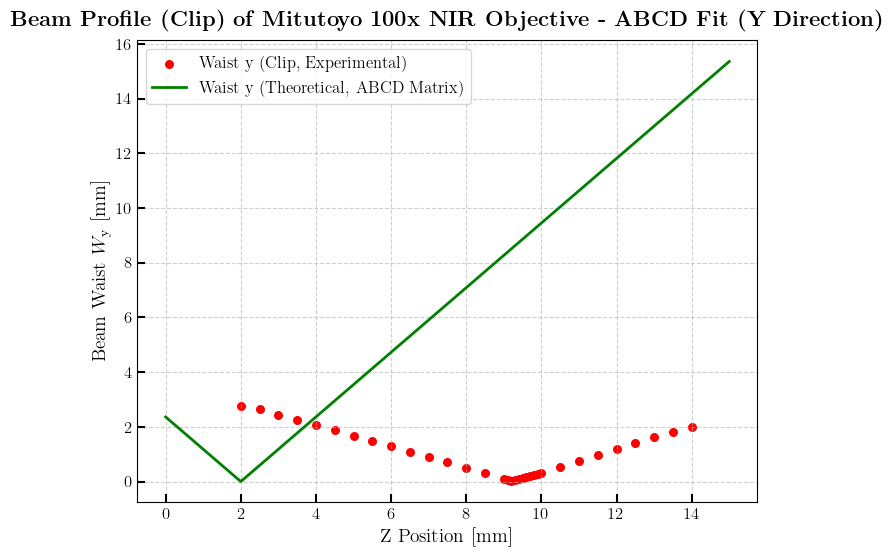

In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Constants
focal_length = 2.0  # in mm (Mitutoyo 100x M Plan APO NIR Objective)
wavelength = 1.064e-3  # in mm (1064 nm)
z_lens2 = 15  # in mm (position of second lens, if applicable)

'''
Initial beam parameter before the lens:
Assuming the beam to be collimated but with a finite waist before the lens
Estimate the beam waist before the lens (W0_initial) and its position
The lens focuses the beam at z = 2 mm, use the lens formula for Gaussian beams
'''

# Function to get initial beam waist
def get_initial_beam_waist(file_path):
    try:
        with open(file_path, 'r', encoding='latin1') as f:
            lines = f.readlines()
        width_x_initial = None
        width_y_initial = None
        
        for line in lines:
            if line.strip() and line.split('\t')[0].isdigit():
                parts = line.strip().split('\t')
                try:
                    if parts[15] != '--' and parts[16] != '--':
                        width_x_initial = float(parts[15]) / 2 / 1000  # radius in mm
                        width_y_initial = float(parts[16]) / 2 / 1000  # radius in mm
                    else:
                        print(f"Missing data ('--') in {file_path} for Beam Width Clip values.")
                        return 4.0
                except (IndexError, ValueError) as e:
                    print(f"Error parsing Beam Width Clip values in {file_path}: {e}. Using default W0_initial = 4 mm.")
                    return 4.0
                break
        
        if width_x_initial is None or width_y_initial is None:
            print(f"Error: Could not find Beam Width Clip values in {file_path}. File content:")
            print("\n".join(lines))  # Print file content for debugging
            print("Using default W0_initial = 4 mm.")
            return 4.0
        else:
            print(f"Found beam width before the lens: Width x = {width_x_initial} mm, Width y = {width_y_initial} mm")
            return (width_x_initial + width_y_initial) / 2
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Using default W0_initial = 4 mm.")
        return 4.0
    except Exception as e:
        print(f"Error reading {file_path}: {e}. Using default W0_initial = 4 mm.")
        return 4.0

# Beam waist after the lens (at focal length)
W0 = width_x.min()  # Minimum width from data
z_waist = z_values[np.argmin(width_x)]  # Position of the waist
z_R = np.pi * W0**2 / wavelength  # Rayleigh range at the waist in mm

# Read W0_initial from file
before_lens_file = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/initial beam waist/7.7cm from ND filter_#001.txt"
W0_initial = get_initial_beam_waist(before_lens_file)  # Initial beam waist in mm (before the lens)

# Assume the lens is at z = 0 and the beam is collimated or has a waist before the lens
z_R_initial = np.pi * W0_initial**2 / wavelength  # Rayleigh range of initial beam
q0 = 0 + 1j * z_R_initial  # Beam parameter at z = 0

# Apply the lens transformation at z = 0
A_lens = 1
B_lens = 0
C_lens = -1 / focal_length
D_lens = 1
q1 = (A_lens * q0 + B_lens) / (C_lens * q0 + D_lens)  # Beam parameter just after the lens

# Theoretical z-values for the curve, starting at z = 0
z_theoretical = np.linspace(0, z_lens2, 1000)
W_theoretical = np.zeros_like(z_theoretical)

# Propagate the beam in free space after the lens
for i, z in enumerate(z_theoretical):
    # ABCD matrix for free space propagation
    A_free = 1
    B_free = z
    C_free = 0
    D_free = 1
    # Transform the beam parameter
    q_new = (A_free * q1 + B_free) / (C_free * q1 + D_free)
    inv_q_new = 1 / q_new
    # Beam width from the imaginary part of 1/q_new
    # Ensure the imaginary part is negative (as expected for a Gaussian beam)
    if inv_q_new.imag < 0:
        W_theoretical[i] = np.sqrt(-wavelength / (np.pi * inv_q_new.imag))
    else:
        W_theoretical[i] = np.nan 

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000
min_waist_theo = min(W_theoretical) * 1000
max_waist_theo = max(W_theoretical) 

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (Clip):")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")
print(f"Theoretical (After Lens):")
print(f"  Min Waist: {min_waist_theo:.2f} μm")
print(f"  Max Waist: {max_waist_theo:.2f} mm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist x (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip) of Mitutoyo 100x NIR Objective - ABCD Fit (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_x = os.path.join(fig_dir, "beam_profile_clip_ABCD_x.png")
plt.savefig(save_beam_ABCD_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist y (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip) of Mitutoyo 100x NIR Objective - ABCD Fit (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_y = os.path.join(fig_dir, "beam_profile_clip_ABCD_y.png")
plt.savefig(save_beam_ABCD_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_y}")
plt.show()


### PLOTTING DATA: GAUSSIAN_DIAMETER_X & GAUSSIAN_DIAMETER_Y

Processed 33 valid data points out of 33 files.
z = 2.0 mm, Width_x = 2.632 mm, Width_y = 2.783 mm
z = 2.5 mm, Width_x = 2.493 mm, Width_y = 2.633 mm
z = 3.0 mm, Width_x = 2.340 mm, Width_y = 2.472 mm
z = 3.5 mm, Width_x = 2.182 mm, Width_y = 2.300 mm
z = 4.0 mm, Width_x = 2.019 mm, Width_y = 2.119 mm
z = 4.5 mm, Width_x = 1.847 mm, Width_y = 1.934 mm
z = 5.0 mm, Width_x = 1.663 mm, Width_y = 1.734 mm
z = 5.5 mm, Width_x = 1.478 mm, Width_y = 1.535 mm
z = 6.0 mm, Width_x = 1.292 mm, Width_y = 1.330 mm
z = 6.5 mm, Width_x = 1.104 mm, Width_y = 1.129 mm
z = 7.0 mm, Width_x = 0.909 mm, Width_y = 0.928 mm
z = 7.5 mm, Width_x = 0.713 mm, Width_y = 0.721 mm
z = 8.0 mm, Width_x = 0.515 mm, Width_y = 0.517 mm
z = 8.5 mm, Width_x = 0.318 mm, Width_y = 0.311 mm
z = 9.0 mm, Width_x = 0.127 mm, Width_y = 0.110 mm
z = 9.1 mm, Width_x = 0.091 mm, Width_y = 0.074 mm
z = 9.2 mm, Width_x = 0.060 mm, Width_y = 0.047 mm
z = 9.3 mm, Width_x = 0.041 mm, Width_y = 0.056 mm
z = 9.4 mm, Width_x = 0.067 mm, Wi

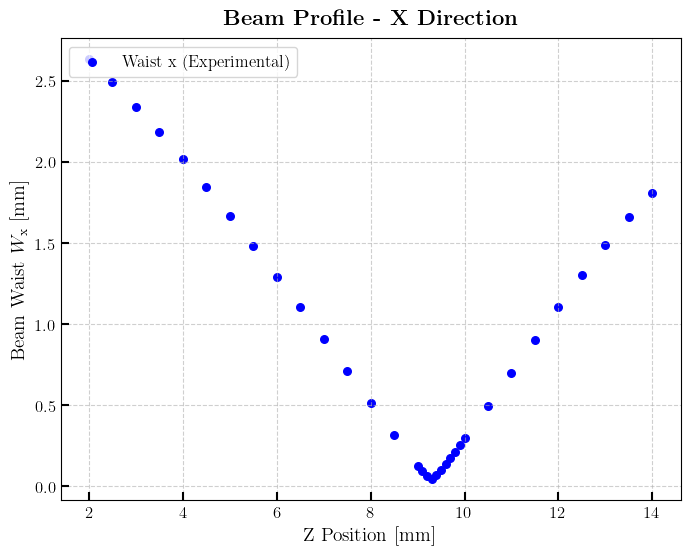

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_y.png


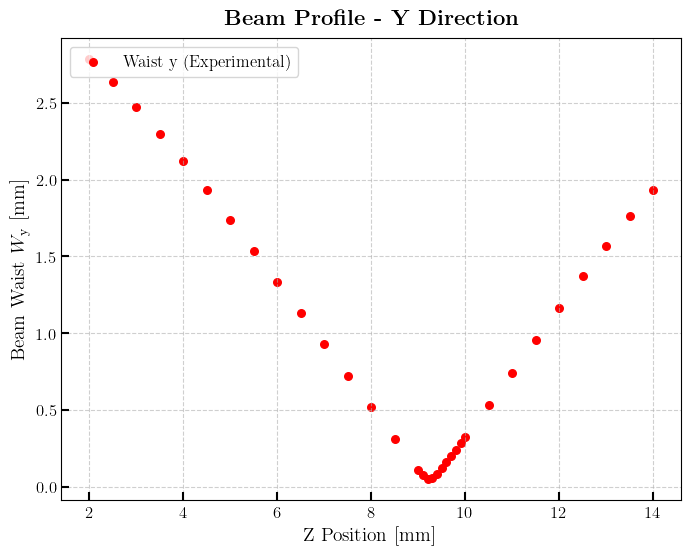

In [19]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and 
                    float(os.path.basename(f).split('mm')[0].strip()) <= 14],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    z_values.append(z)
    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Found beam width before the lens: Width x = 2.40041 mm, Width y = 2.11513 mm
z = 2.0 mm, Width_x = 2.632 mm, Width_y = 2.783 mm
z = 2.5 mm, Width_x = 2.493 mm, Width_y = 2.633 mm
z = 3.0 mm, Width_x = 2.340 mm, Width_y = 2.472 mm
z = 3.5 mm, Width_x = 2.182 mm, Width_y = 2.300 mm
z = 4.0 mm, Width_x = 2.019 mm, Width_y = 2.119 mm
z = 4.5 mm, Width_x = 1.847 mm, Width_y = 1.934 mm
z = 5.0 mm, Width_x = 1.663 mm, Width_y = 1.734 mm
z = 5.5 mm, Width_x = 1.478 mm, Width_y = 1.535 mm
z = 6.0 mm, Width_x = 1.292 mm, Width_y = 1.330 mm
z = 6.5 mm, Width_x = 1.104 mm, Width_y = 1.129 mm
z = 7.0 mm, Width_x = 0.909 mm, Width_y = 0.928 mm
z = 7.5 mm, Width_x = 0.713 mm, Width_y = 0.721 mm
z = 8.0 mm, Width_x = 0.515 mm, Width_y = 0.517 mm
z = 8.5 mm, Width_x = 0.318 mm, Width_y = 0.311 mm
z = 9.0 mm, Width_x = 0.127 mm, Width_y = 0.110 mm
z = 9.1 mm, Width_x = 0.091 mm, Width_y = 0.074 mm
z = 9.2 mm, Width_x = 0.060 mm, Width_y = 0.047 mm
z = 9.3 mm, Width_x = 0.041 mm, Width_y = 0.056 mm
z = 9

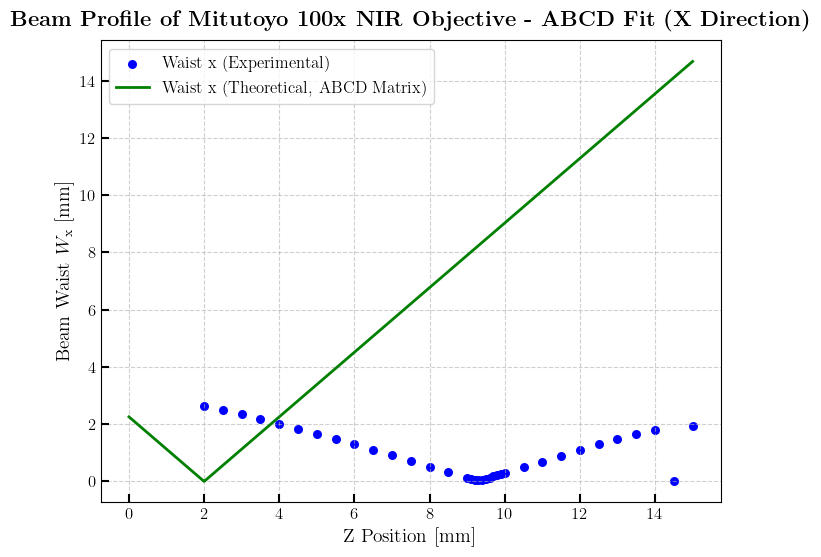

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_ABCD_y.png


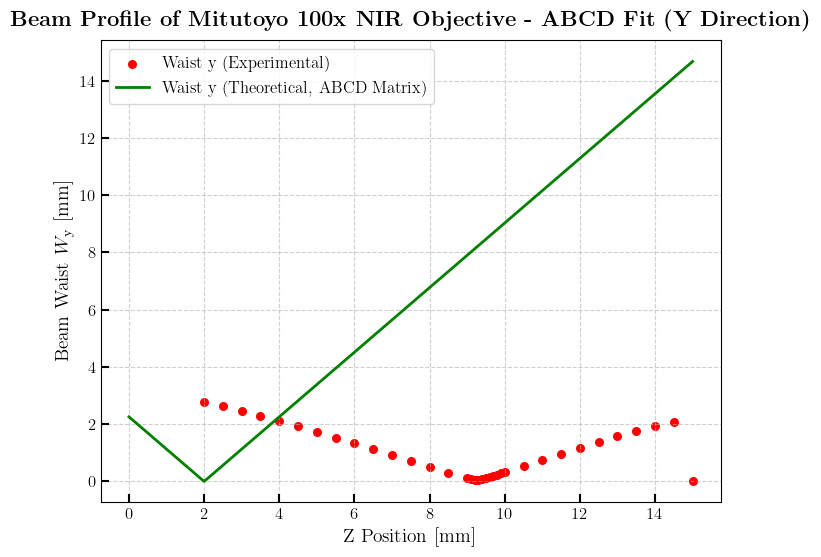

In [11]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values.append(z)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Constants
focal_length = 2.0  # in mm (Mitutoyo 100x M Plan APO NIR Objective)
wavelength = 1.064e-3  # in mm (1064 nm)
z_lens2 = 15  # in mm (position of second lens, if applicable)

'''
Initial beam parameter before the lens:
Assuming the beam to be collimated but with a finite waist before the lens
Estimate the beam waist before the lens (W0_initial) and its position
The lens focuses the beam at z = 2 mm, use the lens formula for Gaussian beams
'''

# Function to get initial beam waist
def get_initial_beam_waist(file_path):
    try:
        with open(file_path, 'r', encoding='latin1') as f:
            lines = f.readlines()
        width_x_initial = None
        width_y_initial = None
        
        for line in lines:
            if line.strip() and line.split('\t')[0].isdigit():
                parts = line.strip().split('\t')
                try:
                    width_x_initial = float(parts[19]) / 2 / 1000  # radius in mm
                    width_y_initial = float(parts[20]) / 2 / 1000  # radius in mm
                except (IndexError, ValueError) as e:
                    print(f"Error parsing Gaussian diameters in {file_path}: {e}. Using default W0_initial = 4 mm.")
                    return 4.0
                break
        
        if width_x_initial is None or width_y_initial is None:
            print(f"Error: Could not find Gaussian diameters in {file_path}. File content:")
            print("\n".join(lines))  # Print file content for debugging
            print("Using default W0_initial = 4 mm.")
            return 4.0
        else:
            print(f"Found beam width before the lens: Width x = {width_x_initial} mm, Width y = {width_y_initial} mm")
            return (width_x_initial + width_y_initial) / 2
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Using default W0_initial = 4 mm.")
        return 4.0
    except Exception as e:
        print(f"Error reading {file_path}: {e}. Using default W0_initial = 4 mm.")
        return 4.0

# Beam waist after the lens (at focal length)
W0 = width_x.min()  # Minimum width from data
z_waist = z_values[np.argmin(width_x)]  # Position of the waist
z_R = np.pi * W0**2 / wavelength  # Rayleigh range at the waist in mm

# Read W0_initial from file
before_lens_file = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/initial beam waist/7.7cm from ND filter_#001.txt"
W0_initial = get_initial_beam_waist(before_lens_file)  # Initial beam waist in mm (before the lens)

# Assume the lens is at z = 0 and the beam is collimated or has a waist before the lens
z_R_initial = np.pi * W0_initial**2 / wavelength  # Rayleigh range of initial beam
q0 = 0 + 1j * z_R_initial  # Beam parameter at z = 0

# Apply the lens transformation at z = 0
A_lens = 1
B_lens = 0
C_lens = -1 / focal_length
D_lens = 1
q1 = (A_lens * q0 + B_lens) / (C_lens * q0 + D_lens)  # Beam parameter just after the lens

# Theoretical z-values for the curve, starting at z = 0
z_theoretical = np.linspace(0, z_lens2, 1000)
W_theoretical = np.zeros_like(z_theoretical)

# Propagate the beam in free space after the lens
for i, z in enumerate(z_theoretical):
    # ABCD matrix for free space propagation
    A_free = 1
    B_free = z
    C_free = 0
    D_free = 1
    # Transform the beam parameter
    q_new = (A_free * q1 + B_free) / (C_free * q1 + D_free)
    inv_q_new = 1 / q_new
    # Beam width from the imaginary part of 1/q_new
    # Ensure the imaginary part is negative (as expected for a Gaussian beam)
    if inv_q_new.imag < 0:
        W_theoretical[i] = np.sqrt(-wavelength / (np.pi * inv_q_new.imag))
    else:
        W_theoretical[i] = np.nan 

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000
min_waist_theo = min(W_theoretical) * 1000
max_waist_theo = max(W_theoretical) 

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")
print(f"Theoretical (After Lens):")
print(f"  Min Waist: {min_waist_theo:.2f} μm")
print(f"  Max Waist: {max_waist_theo:.2f} mm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist x (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile of Mitutoyo 100x NIR Objective - ABCD Fit (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_x = os.path.join(fig_dir, "beam_profile_ABCD_x.png")
plt.savefig(save_beam_ABCD_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist y (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile of Mitutoyo 100x NIR Objective - ABCD Fit (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_y = os.path.join(fig_dir, "beam_profile_ABCD_y.png")
plt.savefig(save_beam_ABCD_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_y}")
plt.show()